<center><img src="https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/http://coursera-university-assets.s3.amazonaws.com/b9/c608c79b5c498a8fa55b117fc3282f/5.-Square-logo-for-landing-page---Alpha.png?auto=format%2Ccompress&dpr=1&w=180&h=180" ></center>


<h1 style="color:black"><center ><b>SMA Assignment 1 - Dataset 5(ChatGPT- 3)
</b><center><h1<br>

 

<h2 style="color:black"><center>Subject & Code - Social Media Analytics (S2-23_AIMLCZG522)</center></h2>    

<h4><b>Group Number - 23 </h4>
<h4><b>Group Members - </b><br><br>
<b>Aradhya Pavan H S (2022AC05457)<br><br>
<b>Divyank Mehta (2022AC05289)<br><br>
<b>Divyanshu Singh (2022AC05011)<br><br>
<b>J Niharika (2022AC05559)<br><br>
<b>Sourava Pani (2022AC05206)<br><br></h4>

In [1]:
#Required Libraries install via pip 
 #!pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud

<h2>Import Libraries/Dataset</h2>

In [2]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns  # Advanced visualization
from wordcloud import WordCloud  # Visualization of word clouds

from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Text feature extraction
from sklearn.preprocessing import LabelEncoder  # Encoding labels
from sklearn.metrics import classification_report, accuracy_score  # Evaluation metrics

from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.naive_bayes import MultinomialNB  # For Naive Bayes classification
from sklearn.ensemble import RandomForestClassifier  # For Random Forest modeling
from sklearn.svm import SVC  # For Support Vector Machine classification

from nltk.stem import WordNetLemmatizer, PorterStemmer  # Text normalization and stemming
from nltk.tokenize import word_tokenize  # Text tokenization
from nltk.corpus import stopwords  # Stopwords for text preprocessing

import re  # Regular expression operations
import nltk  # Natural language processing toolkit

# Setting up plot appearance
sns.set(style="whitegrid")


<h1><b>Data Collection</b></h1>

In [3]:
# Ensuring nltk resources are downloaded (for tokenization and lemmatization)

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [4]:
# Setting pandas option to display long strings in DataFrame columns
pd.set_option('display.max_colwidth', None)

# Loading the dataset
data = pd.read_csv('Dataset5_ChatGPT3.csv')

# Displaying the first 10 rows of the dataset
print("First 10 rows of the dataset:")
data.head(10)

First 10 rows of the dataset:


tweets  \
0                                                                                                                                                                                                                                                        By ChatGPT https://t.co/TnjIaP4Vz2   
1                                                                                                                                                                                                                           https://t.co/TsdPf4Z5ij very scary, ever see the movie player 1   
2                                                                                                                                                                        2023: the year of the battle over #OpenAI #ChatGPT “bias” #agi #elonmusk #ai #GQPClownShow https://t.co/oKtDlL42OD   
3                                                                                                                                                                                                                                                cannot wait until @isis discovers @chatgpt   
4                                                                                                                                                         I've decided to let ChatGPT take over my Twitter and dominate the world with its hilarious AI-powered tweets! #ChatGPT #tweetlife   
5                                                                                                       Disputing a Parking Fine with ChatGPT\n\n#parking #good #proof #received #article #chatgpt #letter #works #fine #paid #disputing\n\nhttps://t.co/7SvgIq5BDv https://t.co/Ku6RW6WoKa   
6  both chatgpt and dall-e suggest the big businesses of the 2020s will be simple tools for endless uses.\n\nthis is a massive shift: nearly every big business of the 2010s built complex tools for single use cases.\n\nvertical/monolithic apps are out; horizontal/modular apps are in.   
7                       ChatGPT is amazing at its earliest public staging. I hope it can improve in its ability to code in various languages. Would make someone like myself with limited coding knowledge an easy buyer of that kind of service. Not to mention unknowably more efficient.   
8                                                                                                                                                                                                       The 5 Best Uses (So Far) for ChatGPT's AI Chatbot https://t.co/qY1pYJMrmX via @CNET   
9                                                                                                                                                                                                Good on Sam to be forthright here on ChatGPT’s beguiling abilities https://t.co/DuQwnzLrsf   

    labels  
0      bad  
1      bad  
2      bad  
3      bad  
4  neutral  
5      bad  
6      bad  
7     good  
8     good  
9     good

In [5]:
# Displaying the shape of the dataset
print("\nShape of the dataset:")
data.shape

# Displaying data types of the columns
print("\nData types of the columns:")
data.dtypes


Shape of the dataset:

Data types of the columns:


tweets    object
labels    object
dtype: object

In [6]:
# Displaying basic statistics for numeric columns
print("\nBasic statistics of the dataset:")
data.describe(include='all')


Basic statistics of the dataset:


tweets labels
count     54825  54825
unique    54557      3
top     ChatGPT    bad
freq         30  27292

In [7]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Counting unique sentiments in the label column
print("\nCount of unique sentiments in the 'labels' column:")
print(data['labels'].value_counts())


Missing values in each column:
tweets    0
labels    0
dtype: int64

Count of unique sentiments in the 'labels' column:
labels
bad        27292
neutral    13820
good       13713
Name: count, dtype: int64


<h3>Data Completeness Check</h3>
<ul>
    <li><strong>No Missing Values:</strong> The dataset has zero missing values in the 'tweets' and 'labels' columns, indicating complete data entries for analysis.</li>
    <li><strong>No Data Imputation Needed:</strong> Absence of missing data eliminates the need for imputation strategies, allowing for straightforward data processing without the requirement to estimate or replace missing entries.</li>
    <li><strong>Immediate Model Training Readiness:</strong> With no missing values, the dataset is immediately ready for any model training and analysis, simplifying the preprocessing workflow.</li>
</ul>


<h1><b> Data Preprocessing</b></h1>

### Data Cleaning and Lowercasing

In [8]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)  # This pattern matches most URLs

    # Removing special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # Converting to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text


# Applying the function and create a new column for the cleaned text
data['cleaned_text'] = data['tweets'].apply(clean_text)

# Displaying the first few rows before and after preprocessing
print("Before and After Preprocessing Comparison:")
data[['tweets', 'cleaned_text']].head()

Before and After Preprocessing Comparison:


tweets  \
0                                                                                                 By ChatGPT https://t.co/TnjIaP4Vz2   
1                                                                    https://t.co/TsdPf4Z5ij very scary, ever see the movie player 1   
2                 2023: the year of the battle over #OpenAI #ChatGPT “bias” #agi #elonmusk #ai #GQPClownShow https://t.co/oKtDlL42OD   
3                                                                                         cannot wait until @isis discovers @chatgpt   
4  I've decided to let ChatGPT take over my Twitter and dominate the world with its hilarious AI-powered tweets! #ChatGPT #tweetlife   

                                                                                                                   cleaned_text  
0                                                                                                                   by chatgpt   
1                                                                                         very scary ever see the movie player   
2                                                 the year of the battle over openai chatgpt bias agi elonmusk ai gqpclownshow   
3                                                                                      cannot wait until isis discovers chatgpt  
4  ive decided to let chatgpt take over my twitter and dominate the world with its hilarious aipowered tweets chatgpt tweetlife

<h3>Cleaning and converting to lower case</h3>
    <ul>
        <li><strong>Process:</strong> Cleansing tweets by removing URLs, special characters, digits, and converting text to lowercase.</li>
        <li><strong>Purpose:</strong> Standardizes text to simplify further analysis.</li>
        <li><strong>Specific Actions:</strong>
            <ul>
                <li><strong>URL Removal:</strong> Removes links such as "http://", "https://", and parts like "www" to focus only on textual content.</li>
                <li><strong>Special Characters and Digits Removal:</strong> Removes characters such as "@", "#", "$", "%", "&", and numerals, emphasizing words only.</li>
                <li><strong>Lowercase Conversion:</strong> Converts all text to lowercase to treat words uniformly regardless of their original case.</li>
            </ul>
        </li>
    </ul>

###  Tokenization,  Handling Negations and Lemmatization

In [9]:
# Handling Negations: Tokenization to better handle negations
def tokenize_and_handle_negations(text):
    tokens = word_tokenize(text)
    new_tokens = []
    skip_next = False
    for i, token in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue
        if token.lower() in ["not", "n't", "no"] and i+1 < len(tokens):
            new_tokens.append("not_" + tokens[i+1])
            skip_next = True  # Skip the next token since it's merged
        else:
            new_tokens.append(token)
    return ' '.join(new_tokens)

data['tokenized_text'] = data['cleaned_text'].apply(tokenize_and_handle_negations)



# Lemmatization 
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenizing again to get individual words for lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

data['lemmatized_text'] = data['tokenized_text'].apply(lemmatize_text)

# Displaying the first 10 rows to see the effects of tokenization and lemmatization
print("Comparison of Text at Each Stage:")
data[['cleaned_text', 'tokenized_text', 'lemmatized_text']].head(10)

Comparison of Text at Each Stage:


cleaned_text  \
0                                                                                                                                                                                                                                                           by chatgpt    
1                                                                                                                                                                                                                                 very scary ever see the movie player    
2                                                                                                                                                                                         the year of the battle over openai chatgpt bias agi elonmusk ai gqpclownshow    
3                                                                                                                                                                                                                              cannot wait until isis discovers chatgpt   
4                                                                                                                                          ive decided to let chatgpt take over my twitter and dominate the world with its hilarious aipowered tweets chatgpt tweetlife   
5                                                                                                                                                disputing a parking fine with chatgptnnparking good proof received article chatgpt letter works fine paid disputingnn    
6  both chatgpt and dalle suggest the big businesses of the s will be simple tools for endless usesnnthis is a massive shift nearly every big business of the s built complex tools for single use casesnnverticalmonolithic apps are out horizontalmodular apps are in   
7       chatgpt is amazing at its earliest public staging i hope it can improve in its ability to code in various languages would make someone like myself with limited coding knowledge an easy buyer of that kind of service not to mention unknowably more efficient   
8                                                                                                                                                                                                               the  best uses so far for chatgpts ai chatbot  via cnet   
9                                                                                                                                                                                                    good on sam to be forthright here on chatgpts beguiling abilities    

                                                                                                                                                                                                                                                         tokenized_text  \
0                                                                                                                                                                                                                                                            by chatgpt   
1                                                                                                                                                                                                                                  very scary ever see the movie player   
2                                                                                                                                                                                          the year of the battle over openai chatgpt bias agi elonmusk ai gqpclownshow   
3                                                                                                                                                                                                                             can not_wait until isis

<h3>Advanced Text Preprocessing </h3>
    <ul>
        <li><strong>Process:</strong> Enhancing tokenization to manage negations and applying lemmatization for normalization.</li>
        <li><strong>Purpose:</strong> Improves the handling of linguistic nuances and standardizes text for deeper analysis.</li>
        <li><strong>Specific Actions:</strong>
            <ul>
                <li><strong>Negation Handling:</strong> Modifies tokens to combine negations like "not", "no", and contractions ending in "n't" with the subsequent word, enhancing the contextual understanding in analysis.</li>
                <li><strong>Lemmatization:</strong> Simplifies words to their base or dictionary form, ensuring that different forms of a word are treated as the same token.</li>
            </ul>
        </li>
    </ul>

<h3>Reasons for Choosing Lemmatization Over Stemming for our dataset</h3>
<ul>
  <li><strong>Valid Words:</strong> Lemmatization ensures outputs are dictionary words, unlike stemming's often crude cuts. This improves the readability and quality of text data in our dataset.</li>
  <li><strong>Context Precision:</strong> It considers word context, providing more accurate text processing. This precision is critical for maintaining the integrity of semantic meanings in sentiment analysis, influencing the accuracy of the analysis.</li>
  <li><strong>Irregular Forms:</strong> Effectively handles irregular verbs and nouns, ensuring correct base forms are used. This is crucial in our dataset where correct interpretation of verb tenses and nouns can significantly affect sentiment scores.</li>
</ul>


### Tweet Length Analysis Before and  After Preprocessing

In [10]:
# Calculating the tweets length
data['original_length'] = data['tweets'].apply(lambda x: len(word_tokenize(x)))
data['lemmatized_length'] = data['lemmatized_text'].apply(lambda x: len(word_tokenize(x)))

# Calculating average tweets lengths
average_original_length = data['original_length'].mean()
average_lemmatized_length = data['lemmatized_length'].mean()

# Creating a DataFrame to display average tweets lengths 
average_lengths_df = pd.DataFrame({
    'Tweet Length Type': ['Original', 'Lemmatized'],
    'Average Length (words)': [average_original_length, average_lemmatized_length]
})

# Displaying the average tweets length DataFrame
average_lengths_df

Tweet Length Type  Average Length (words)
0          Original               27.659790
1        Lemmatized               20.185062

<ul>
    <li><strong>Initial Length:</strong> Original tweets average 27.66 words.</li>
    <li><strong>Post-Lemmatization:</strong> Average length reduces to 20.19 words after processing.</li>
</ul>
<h3>Impact of Preprocessing</h3>
<ul>
    <li><strong>Length Reduction:</strong> Preprocessing decreases word count, indicating removal of extraneous content.</li>
    <li><strong>Content Focus:</strong> Shorter, clearer tweets enhance readability and analysis.</li>
</ul>

### Visualization of Tweet Length Distribution Before and After Text Processing

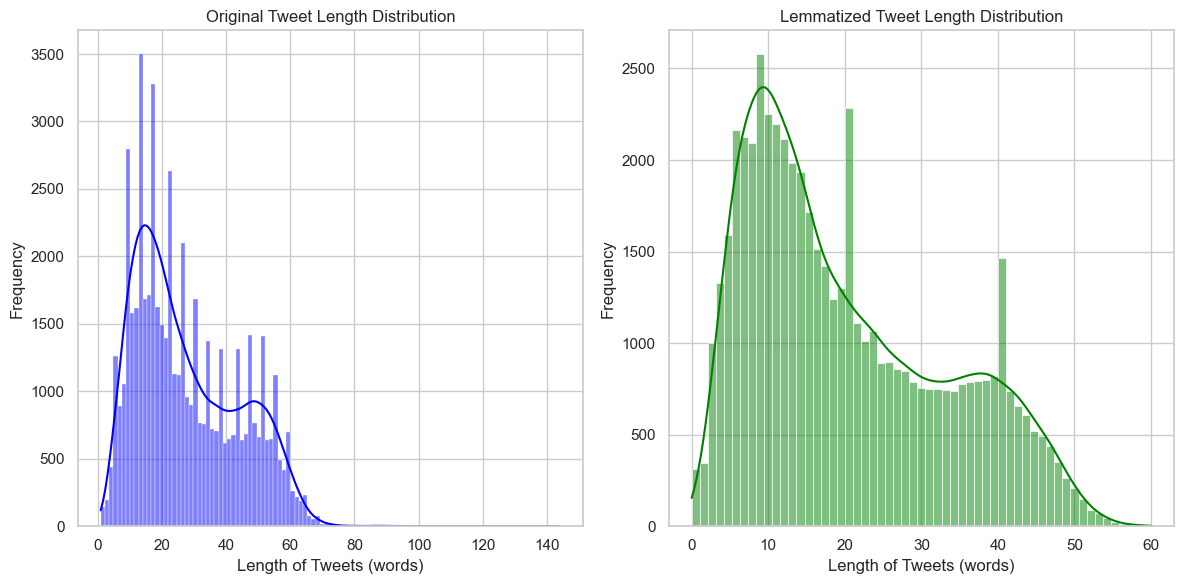

In [11]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['original_length'], color='blue', kde=True)
plt.title('Original Tweet Length Distribution')
plt.xlabel('Length of Tweets (words)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['lemmatized_length'], color='green', kde=True)
plt.title('Lemmatized Tweet Length Distribution')
plt.xlabel('Length of Tweets (words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

>
<h3>Original Tweet Distribution</h3>
<ul>
    <li><strong>Variable Lengths:</strong> Original lengths vary widely, peaking around 10-20 words.</li>
</ul>
<h3>Lemmatized Tweet Distribution</h3>
<ul>
    <li><strong>Tighter Distribution:</strong> Post-processing, tweet lengths peak more consistently between 5 and 20 words.</li>
    <li><strong>Fewer Extremes:</strong> Sharp reduction in very long tweets.</li>
</ul>


## Sentiment Analysis Word Clouds Across Different Labels

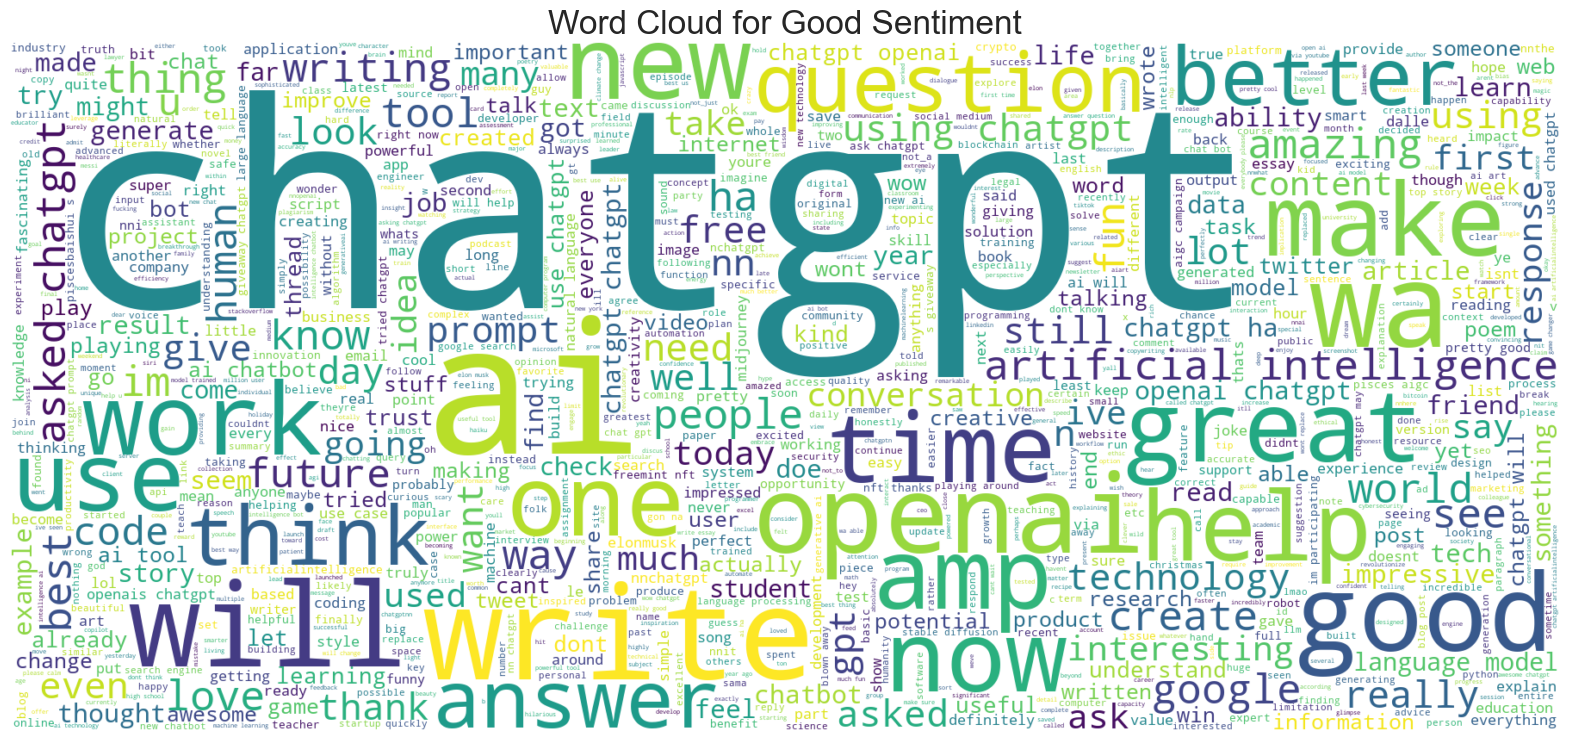

In [12]:
good_text = " ".join(data[data['labels'].str.lower() == 'good']['lemmatized_text'])

# Function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=1800, max_words=1000, height=800,  background_color='white').generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title,fontsize=24)
    plt.show()

# Generating word clouds for 'good' sentiment
generate_word_cloud(good_text, 'Word Cloud for Good Sentiment')

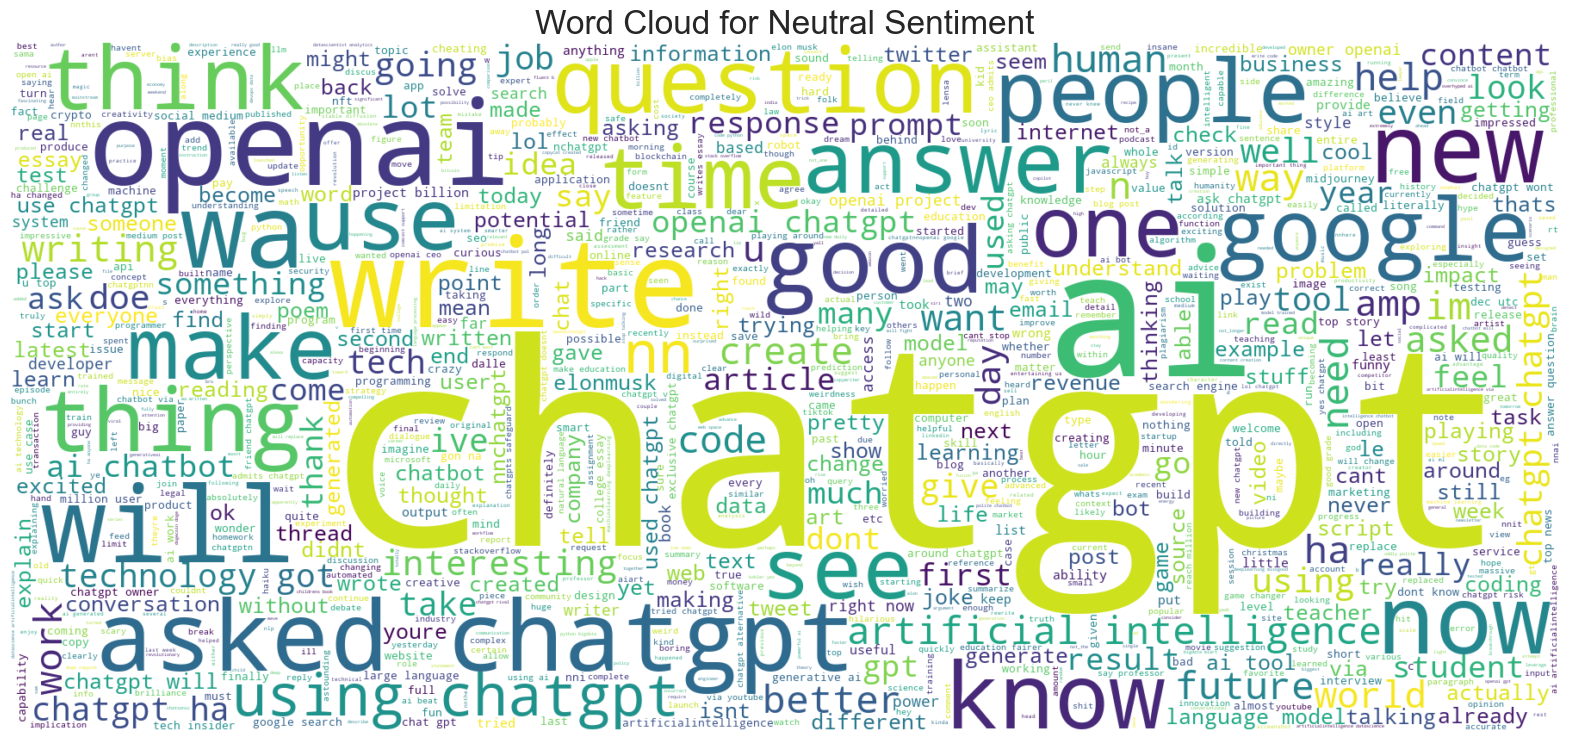

In [13]:
neutral_text = " ".join(data[data['labels'].str.lower() == 'neutral']['lemmatized_text'])


# Function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=1800, max_words=1000, height=800, background_color='white').generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title,fontsize=24)
    plt.show()

# Generating word clouds for 'neutral' sentiment
generate_word_cloud(neutral_text, 'Word Cloud for Neutral Sentiment')

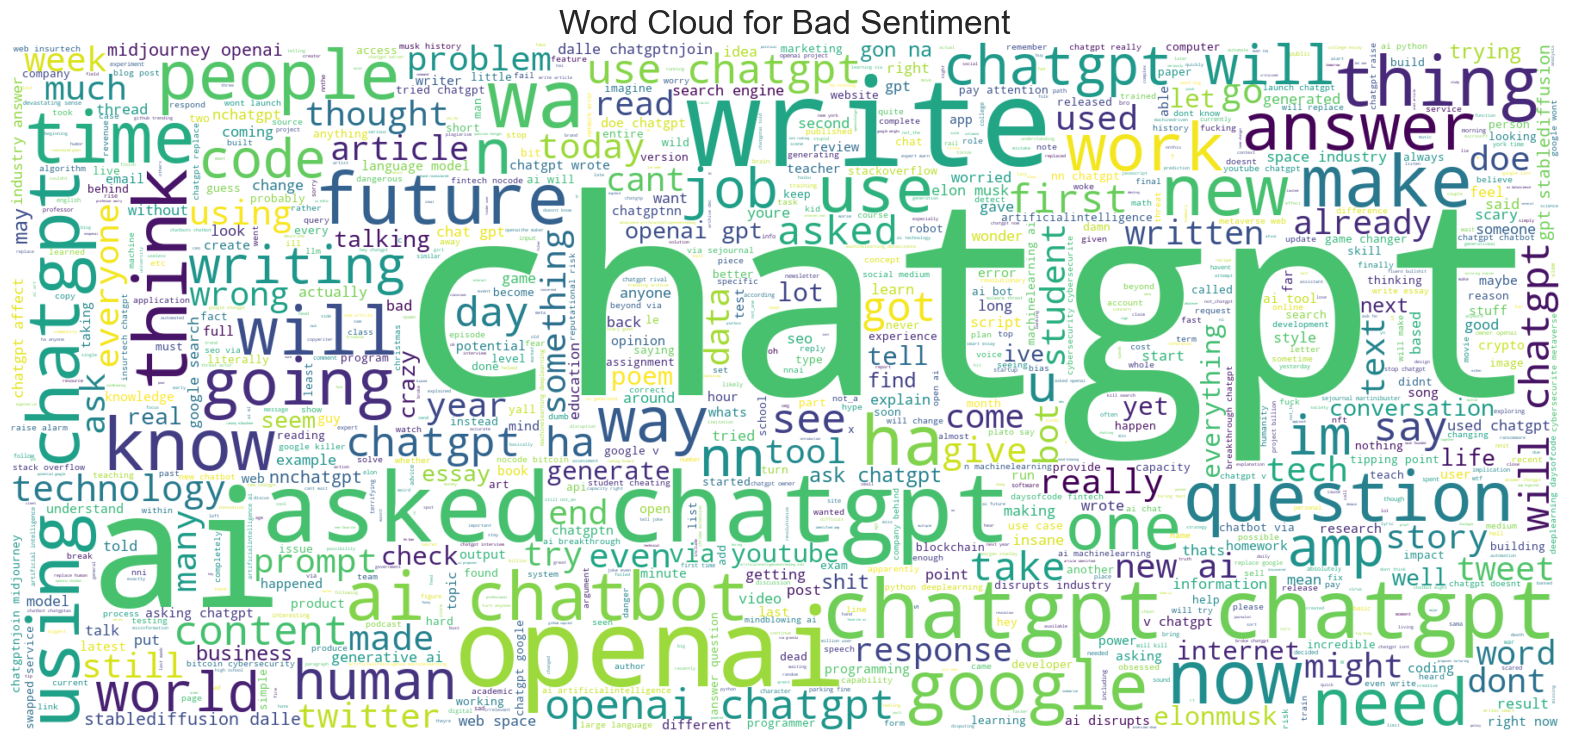

In [14]:
bad_text = " ".join(data[data['labels'].str.lower() == 'bad']['lemmatized_text'])
# Function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=1800, max_words=1000, height=800, background_color='white').generate(text)
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title,fontsize=24)
    plt.show()
# Generating word clouds for 'bad' sentiment
generate_word_cloud(bad_text, 'Word Cloud for Bad Sentiment')

 ### Encoding Text Labels for  Analysis

In [15]:
# Data preprocessing
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['labels'])

# Printing the unique labels and their encoded form
print("Unique labels and their encoded form:")
pd.DataFrame({
    'Label': data['labels'].unique(),
    'Encoded': label_encoder.transform(data['labels'].unique())
})

Unique labels and their encoded form:


Label  Encoded
0      bad        0
1  neutral        2
2     good        1

 <ul>
        <li><strong>Label Encoding Method:</strong> Converts categorical labels into numeric identifiers using Scikit-learn's <code>LabelEncoder</code>.</li>
        <li><strong>Application:</strong> The <code>fit_transform</code> method is used on the 'labels' column to assign numeric values to each unique category.</li>
        <li><strong>Specific Encoding Examples:</strong> 'bad' is encoded as 0, 'good' as 1, and 'neutral' as 2, demonstrating non-sequential numeric assignment.</li>
        <li><strong>ML Compatibility:</strong> Numeric encoding is essential as machine learning models require numeric input for processing and analysis.</li>
        <li><strong>Efficiency in Processing:</strong> Numeric data enhances processing efficiency and simplifies algorithm implementation.</li>
        <li><strong>Improves Model Training:</strong> Numeric labels help in effective model training, crucial for accurate predictions.</li>
    </ul>

<h1><b>Feature Extraction TF-IDF</b></h1>

In [16]:
# Defining the feature and target variable
X = data['lemmatized_text']  # or any text column after preprocessing
y = data['label_encoded']

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Transforming text data into TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Printing the shape and feature names of the TF-IDF matrix
print("\nTF-IDF matrix shape:", X_tfidf.shape)
print("Feature names of TF-IDF vectorizer:", tfidf_vectorizer.get_feature_names_out()[:20])  # prints first 20 features for brevity


TF-IDF matrix shape: (54825, 5000)
Feature names of TF-IDF vectorizer: ['ability' 'ability to' 'able' 'able to' 'about' 'about ai' 'about an'
 'about artificial' 'about chatgpt' 'about how' 'about it' 'about my'
 'about openai' 'about openais' 'about the' 'about this' 'about to'
 'about using' 'about what' 'absolute']


 <h3>TF-IDF Feature Extraction </h3>
    <ul>
        <li><strong>Enhances Model Performance:</strong> Balances term importance, emphasizing words critical for sentiment analysis.</li>
        <li><strong>Reduces Data Complexity:</strong> Limits features to 5000 top n-grams, streamlining data for faster processing.</li>
        <li><strong>Focuses on Key Terms:</strong> Filters out less informative words, sharpening the model's focus on relevant text.</li>
    </ul>

 <h3>Reasons for Choosing TF-IDF over Word Embeddings(word2vec)</h3>
 <ul>
    <li><strong>Model Comparison:</strong> While using gensim's Word2Vec, accuracy and other evaluation metrics were notably lower compared to results obtained with TF-IDF.</li>
   <h4>Possible Reasons for TF-IDF's Superior Performance Over Word2Vec</h4>
    <ul>
        <li><strong>Overfitting Issues:</strong> Word2Vec may overfit small datasets, while TF-IDF performs consistently well across different data sizes.</li>
        <li><strong>Relevance Measurement:</strong> TF-IDF accurately assesses word significance in specific contexts, essential for precise sentiment analysis.</li>
        <li><strong>Modeling Suitability:</strong> TF-IDF's focus on term importance aligns better with sentiment analysis needs than Word2Vec's broad semantic capture.</li>
    </ul>
</ul>


<h1><b> Model Selection and Model Training</b></h1>

<h2>Split data into training/testing sets</h2>

In [17]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Printing the shapes of the train and test sets
print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (43860, 5000)
Test set shape: (10965, 5000)


<h2>Data Splitting </h2>
<ul>
    <li><strong>Function:</strong> Divides the dataset into training and testing subsets to evaluate the model's performance.</li>
    <li><strong>Method:</strong> Uses Scikit-learn's <code>train_test_split</code> function.</li>
    <li><strong>Configuration:</strong> Allocates 80% of the data to the training set and 20% to the testing set, with a random state set for reproducibility.</li>
   
</ul>

<h2>Model Training</h2>

In [18]:
# Initializing the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest_model.fit(X_train, y_train)

# Prediction on the training set
y_train_pred = random_forest_model.predict(X_train)

# Prediction on the test set
y_test_pred = random_forest_model.predict(X_test)

# Evaluating the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)


# Printing the accuracy and classification report for the training set
print("Training Accuracy of the Random Forest model:", train_accuracy)
print("Training Classification Report:\n", train_report)

Training Accuracy of the Random Forest model: 0.9966940264477884
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     21830
           1       1.00      0.99      1.00     10954
           2       1.00      0.99      1.00     11076

    accuracy                           1.00     43860
   macro avg       1.00      1.00      1.00     43860
weighted avg       1.00      1.00      1.00     43860



<h1><b>Model Evaluation</b></h1> 

In [19]:
# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the accuracy and classification report for the test set
print("Test Accuracy of the Random Forest model:", test_accuracy)
print("Test Classification Report:\n", test_report)

Test Accuracy of the Random Forest model: 0.7276789785681714
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      5462
           1       0.69      0.69      0.69      2759
           2       0.72      0.38      0.49      2744

    accuracy                           0.73     10965
   macro avg       0.72      0.66      0.67     10965
weighted avg       0.72      0.73      0.71     10965



<h3>Random Forest Model Implementation Summary</h3>
<ul>
  <li><strong>Model Initialization:</strong> A Random Forest Classifier with 100 trees is set up, using a consistent random seed for reproducibility.</li>
  <li><strong>Model Training:</strong> The classifier is trained on the provided training data, allowing it to learn and identify patterns from labeled sentiment examples.</li>
  <li><strong>Prediction on Training Data:</strong> Predictions are made on the same data used for training to evaluate how well the model has learned and can replicate its understanding of the sentiment classification.</li>
  <li><strong>Prediction on Test Data:</strong> The model is also tested on a separate set of data to assess its performance and generalization ability on new, unseen text data.</li>
  <li><strong>Performance Evaluation:</strong> Accuracy and detailed classification metrics (precision, recall, F1-score) are computed for both training and test data to gauge the model's effectiveness and its potential areas for improvement.</li>
</ul>


<h3>Random Forest Model Performance Overview</h3>
<ul>
    <li><strong>Training Accuracy: 99.67%</strong> - Indicates almost perfect sentiment prediction on the training data.</li>
    <li><strong>High Precision and Recall:</strong> Near 100% for all classes, showing excellent identification and retrieval of relevant instances during training.</li>
    <li><strong>Perfect F1-Scores:</strong> Nearly 1.00 across classes, suggesting optimal balance between precision and recall.</li>
</ul>
<ul>
    <li><strong>Testing Accuracy: 72.77%</strong> - Significantly lower than training, suggesting overfitting issues.</li>
    <li><strong>Varying Precision:</strong> Ranges from 69% to 75%, indicating differences in identifying true positives among classes.</li>
    <li><strong>Uneven Recall:</strong> Class 0 performs well at 92%, but class 2 struggles with only 38%, indicating missed positives.</li>
    <li><strong>Mixed F1-Scores:</strong> From high in class 0 (83%) to low in class 2 (49%), showing uneven classification performance.</li>
</ul>
<ul>
  <ul>
<h3>Strategies to Enhance Model Performance</h3>
<ul>
    <li><strong>Model Tuning:</strong> Adjust tree count and depth, and apply cross-validation to enhance generalization.</li>
    <li><strong>Feature Enhancement:</strong> Enhance text analysis by integrating advanced data features and techniques.</li>
</ul>

</ul>

</ul>


<h1>Optionally Explored Alternative Models </h1>
<ul>
    <li><strong>Model Diversity:</strong> Experiment with different machine learning algorithms such as Naive Bayes, Support Vector Machines (SVM), and Logistic Regression to gauge their performance in sentiment analysis tasks and determine which provides the most accurate predictions.</li>
  
</ul>


In [20]:
# Initializing the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

# Training the model
naive_bayes_model.fit(X_train, y_train)

# Prediction on the training set
y_train_pred_nb = naive_bayes_model.predict(X_train)

# Prediction on the test set
y_test_pred_nb = naive_bayes_model.predict(X_test)

# Evaluating the model on the training set
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
train_report_nb = classification_report(y_train, y_train_pred_nb)

# Printing the accuracy and classification report for the training set
print("Training Accuracy of the Naive Bayes model:", train_accuracy_nb)
print("Training Classification Report for Naive Bayes:\n", train_report_nb)


# Evaluating the model on the test set
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
test_report_nb = classification_report(y_test, y_test_pred_nb)

# Printing the accuracy and classification report for the test set
print("Test Accuracy of the Naive Bayes model:", test_accuracy_nb)
print("Test Classification Report for Naive Bayes:\n", test_report_nb)


Training Accuracy of the Naive Bayes model: 0.7319653442772458
Training Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83     21830
           1       0.73      0.69      0.71     10954
           2       0.68      0.37      0.48     11076

    accuracy                           0.73     43860
   macro avg       0.72      0.67      0.67     43860
weighted avg       0.72      0.73      0.71     43860

Test Accuracy of the Naive Bayes model: 0.6955768353853169
Test Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82      5462
           1       0.67      0.62      0.64      2759
           2       0.58      0.32      0.41      2744

    accuracy                           0.70     10965
   macro avg       0.66      0.62      0.62     10965
weighted avg       0.68      0.70      0.67     10965



In [21]:
# Initializing the Support Vector Machine model
svm_model = SVC(kernel='linear')  # Linear kernel is often used for text classification

# Training the model
svm_model.fit(X_train, y_train)

# Prediction on the training set
y_train_pred_svm = svm_model.predict(X_train)

# Prediction on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluating the model on the training set
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
train_report_svm = classification_report(y_train, y_train_pred_svm)


# Printing the accuracy and classification report for the training set
print("Training Accuracy of the SVM model:", train_accuracy_svm)
print("Training Classification Report for SVM:\n", train_report_svm)


# Evaluating the model on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_report_svm = classification_report(y_test, y_test_pred_svm)

# Printing the accuracy and classification report for the test set
print("Test Accuracy of the SVM model:", test_accuracy_svm)
print("Test Classification Report for SVM:\n", test_report_svm)

Training Accuracy of the SVM model: 0.842453260373917
Training Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     21830
           1       0.86      0.80      0.83     10954
           2       0.78      0.68      0.73     11076

    accuracy                           0.84     43860
   macro avg       0.83      0.81      0.82     43860
weighted avg       0.84      0.84      0.84     43860

Test Accuracy of the SVM model: 0.7903328773369813
Test Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      5462
           1       0.80      0.72      0.76      2759
           2       0.67      0.58      0.62      2744

    accuracy                           0.79     10965
   macro avg       0.77      0.74      0.75     10965
weighted avg       0.78      0.79      0.78     10965



In [22]:
# Initializing the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence

# Training the model
logistic_model.fit(X_train, y_train)

# Prediction on the training set
y_train_pred_lr = logistic_model.predict(X_train)

# Prediction on the test set
y_test_pred_lr = logistic_model.predict(X_test)

# Evaluating the model on the training set
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_report_lr = classification_report(y_train, y_train_pred_lr)

# Evaluating the model on the test set
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_report_lr = classification_report(y_test, y_test_pred_lr)

# Printing the accuracy and classification report for the training set
print("Training Accuracy of the Logistic Regression model:", train_accuracy_lr)
print("Training Classification Report for Logistic Regression:\n", train_report_lr)

# Printing the accuracy and classification report for the test set
print("Test Accuracy of the Logistic Regression model:", test_accuracy_lr)
print("Test Classification Report for Logistic Regression:\n", test_report_lr)


Training Accuracy of the Logistic Regression model: 0.8198358413132695
Training Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     21830
           1       0.82      0.79      0.81     10954
           2       0.77      0.60      0.67     11076

    accuracy                           0.82     43860
   macro avg       0.81      0.78      0.79     43860
weighted avg       0.82      0.82      0.81     43860

Test Accuracy of the Logistic Regression model: 0.7649794801641587
Test Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      5462
           1       0.76      0.72      0.74      2759
           2       0.64      0.48      0.55      2744

    accuracy                           0.76     10965
   macro avg       0.74      0.71      0.72     10965
weighted avg       0.75      0.76      0.75  